#  Linear regression

Linear regression is a linear approach to modeling the relationship between a  dependent variable and one or more  independent variables.It is given by equation:

y=a*x+b

y is dependent variable & x is independent variable

b is the point at which line cut at y(intercept) & a is slope.


# To Find Line of regression using least square method

Implementation on titanic dataset to predict fare on the basic of age

In [33]:
# import library 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)#size of plot

In [34]:
#read data
data=pd.read_csv('train.csv')

In [35]:
print(data.shape)

(891, 12)


In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
#calculate median to remove null value
medianFare=data['Age'].median()
medianAge=data['Fare'].median()

In [38]:
#remove null value
data['Age'].fillna(medianFare,inplace=True)
data['Fare'].fillna(medianAge,inplace=True)

In [39]:
#collecting x(independent) and y(dependent)
X=data['Age'].values
Y=data['Fare'].values


In [40]:
#slope(b1)=Iterate((x-meanofx)*(y-meanofy))/Iterate(square of(x-meanofx))
mean_x=np.mean(X)
mean_y=np.mean(Y)
mean_y

32.204207968574636

In [41]:
m=len(X)
m

891

In [42]:
numer=0
denom=0

In [43]:
for i in range(m):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2

In [44]:
#numer=sum of Iteration((x-meanofx)*(y-meanofy))
numer

55675.52283276433

In [45]:
#denom-sum of Iteration(square of(x-meanofx))

denom

150866.1234686867

In [46]:
#slope(b1)
b1=numer/denom
b1



0.3690392617817887

In [47]:
#intercept(bo)
b0=mean_y-(b1*mean_x)
b0

21.368631241135944

In [48]:
max_x=np.max(X)+100
min_x=np.min(X)-100

In [49]:
#creates sequences of evenly spaced numbers structured 
x=np.linspace(min_x,max_x,1000)

In [50]:
y=b0+b1*x


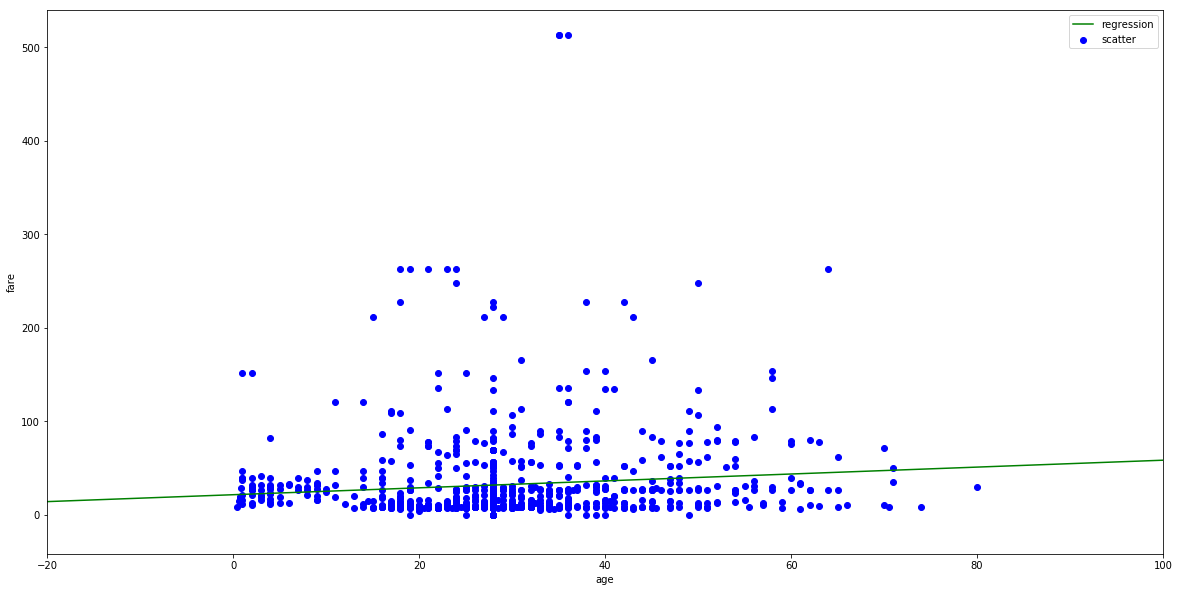

In [51]:
plt.plot(x,y,color="g",label='regression')
plt.scatter(X,Y,color='blue',label='scatter')
plt.xlim(-20,100)
plt.xlabel('age')
plt.ylabel('fare')
plt.legend()
plt.show()

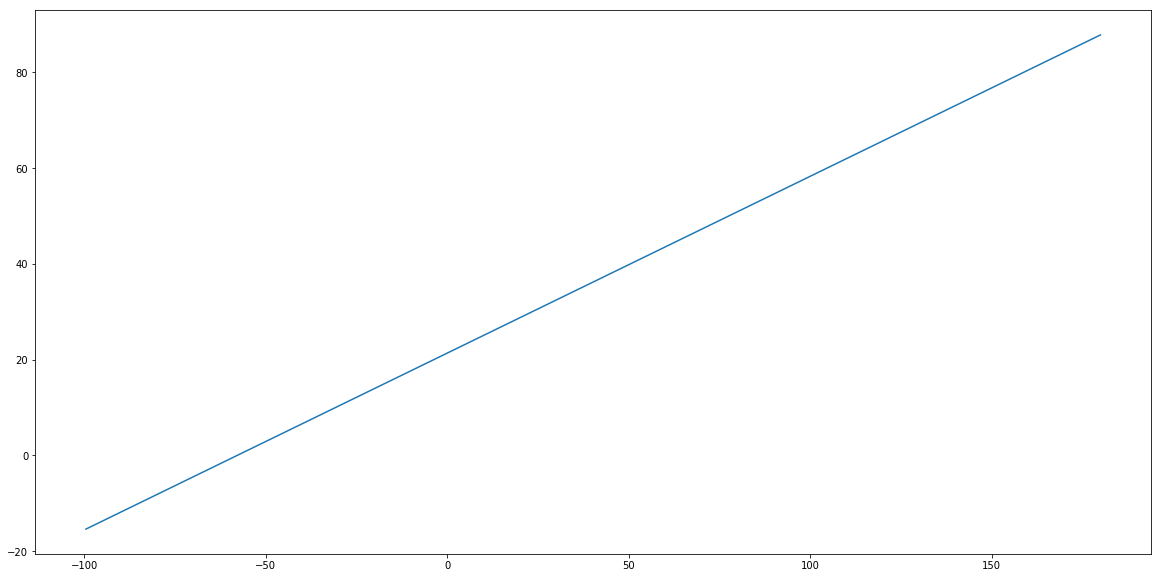

In [52]:
plt.plot(x,y)

Coefficient of determination (Rsquare)-
Rsquare predict how good your model is.

In [53]:
#ss_t is the total sum of squares and ss_r is the total sum of squares of residuals and 
ss_t = 0
ss_r = 0
for i in range(m):
 y_pred = b0 + b1 * X[i]
ss_t += (Y[i] - mean_y) ** 2
ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [55]:
X=X.reshape(m,1)#can't use Rank 1 matrix

In [56]:
reg=LinearRegression()

In [57]:
reg=reg.fit(X,Y)#fit the modal .Calculate optimal value of b0 and b1


In [58]:
Y_pred=reg.predict(X)#predict response
reg.intercept_

21.368631241135958

In [59]:
reg.coef_


array([0.36903926])

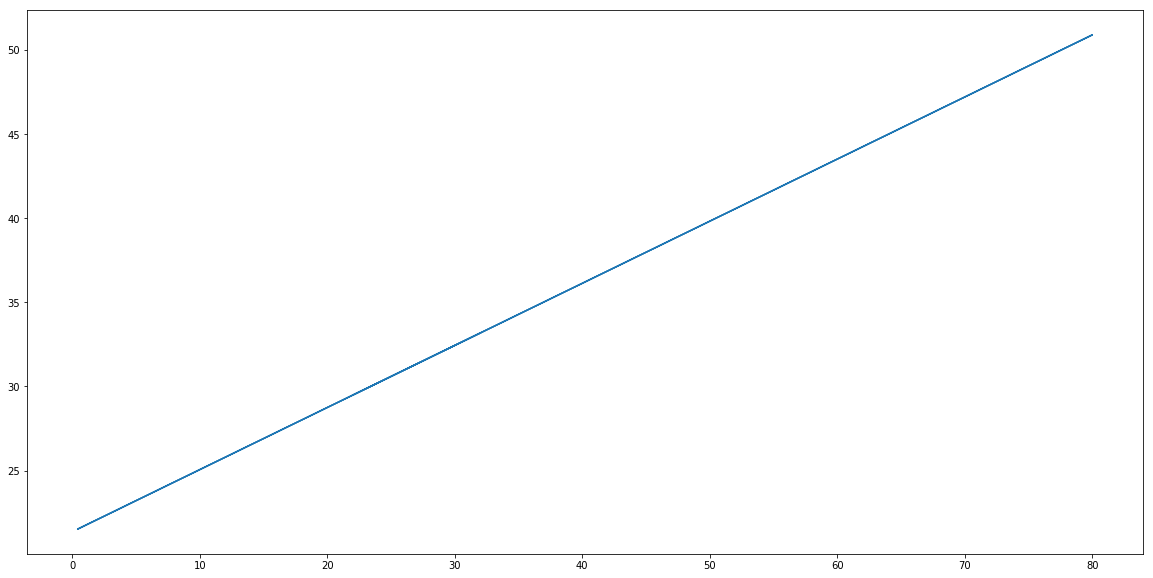

In [61]:
plt.plot(X,Y_pred)

In [62]:
rR2=reg.score(X,Y)

In [63]:
rR2

0.00934865098372839